In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report


In [3]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print('Number of classes: %d' %len(np.unique(iris_y)))
print('Number of data points: %d' %len(iris_y))


Number of classes: 3
Number of data points: 150


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)

print ("Training size: %d" %len(y_train))
print ("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


In [5]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 8, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Print results for 20 test data points:")
print ("Predicted labels: ", y_pred[20:40])
print ("Ground truth    : ", y_test[20:40])

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Print results for 20 test data points:
Predicted labels:  [0 1 0 1 2 1 1 2 0 1 1 0 2 0 0 2 0 1 2 2]
Ground truth    :  [0 1 0 1 2 1 1 2 0 1 1 0 2 0 0 2 0 1 2 2]
Accuracy of 10NN with major voting: 94.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.85      0.88        13
           2       0.90      0.95      0.93        20

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50



In [6]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 8, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Accuracy of 10NN with major voting: 96.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.85      0.92        13
           2       0.91      1.00      0.95        20

    accuracy                           0.96        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.96      0.96      0.96        50



In [7]:
def myweight(distances):
    sigma2 = .5 # we can change this number
    return np.exp(-distances**2/sigma2)

clf = neighbors.KNeighborsClassifier(n_neighbors = 8, p = 2, weights = myweight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy of 10NN with major voting: 96.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.85      0.92        13
           2       0.91      1.00      0.95        20

    accuracy                           0.96        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.96      0.96      0.96        50



In [9]:
df = pd.read_csv('TeleCustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [10]:
X = df.drop(['custcat'], axis = 1)
y = df['custcat']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.32


Minimum error:- 0.615 at K = 37


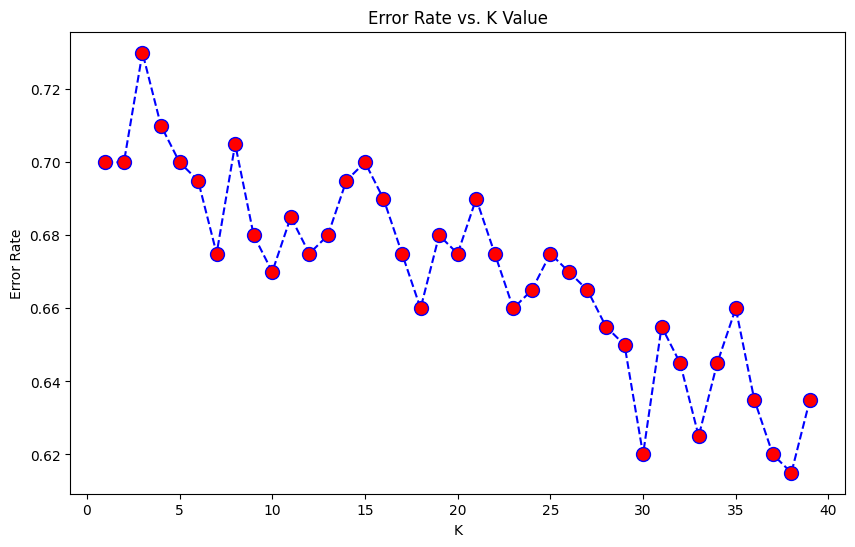

In [11]:
error_rate = []
for i in range(1,40):
 knn = neighbors.KNeighborsClassifier(n_neighbors=i,weights = 'distance')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.385 at K = 37


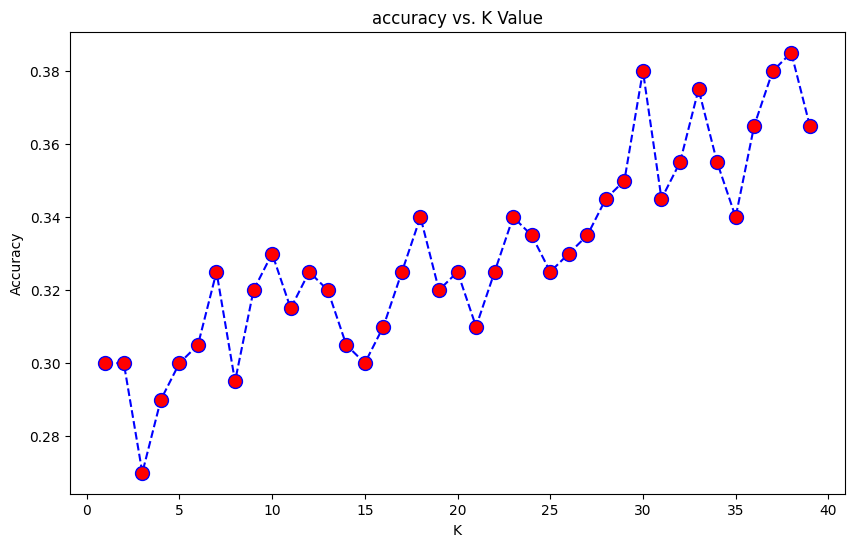

In [12]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = i,weights = 'distance').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('slr', LinearRegression())])
knn_lr = KNeighborsRegressor(n_neighbors = 3)

In [14]:
df=pd.read_csv('cruise_ship_info.csv')
df.head()
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = df[cols_selected].iloc[:,0:4].values

y = df[cols_selected]['crew']
sc_y = StandardScaler()
train_score_lr = []
train_score_knn =  []

In [15]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [16]:
n = 15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split( X, y,
                                      test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:,
                                      np.newaxis]).flatten()
    train_score_lr = np.append(train_score_lr,
                               np.mean(cross_val_score(pipe_lr,
                               X_train, y_train_std,
                               scoring ='r2' , cv = 10)))
    train_score_knn = np.append(train_score_knn,
                                np.mean(cross_val_score(knn_lr,
                                X_train, y_train_std,
                                scoring ='r2' , cv = 10)))
train_mean_lr = np.mean(train_score_lr)
train_std_lr = np.std(train_score_lr)
train_mean_knn = np.mean(train_score_knn)
train_std_knn = np.std(train_score_knn)
print('R2 train for lr: %.3f +/- %.3f' %
                             (train_mean_lr,train_std_lr))
print('R2 train for knn_lr: %.3f +/- %.3f' %
                             (train_mean_knn,train_std_knn))

C:\Users\dell\AppData\Local\Temp\ipykernel_11936\2454210547.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = sc_y.fit_transform(y_train[:,
C:\Users\dell\AppData\Local\Temp\ipykernel_11936\2454210547.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = sc_y.fit_transform(y_train[:,
C:\Users\dell\AppData\Local\Temp\ipykernel_11936\2454210547.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = sc_y.fit_transform(y_train[:,
C:\Users\dell\AppData\Local\Temp\ipykernel_11936\2454210547.py:5: FutureWarning: Support for multi-dimensional indexin

R2 train for lr: 0.914 +/- 0.013
R2 train for knn_lr: 0.843 +/- 0.033


C:\Users\dell\AppData\Local\Temp\ipykernel_11936\2454210547.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = sc_y.fit_transform(y_train[:,
C:\Users\dell\AppData\Local\Temp\ipykernel_11936\2454210547.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = sc_y.fit_transform(y_train[:,
C:\Users\dell\AppData\Local\Temp\ipykernel_11936\2454210547.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = sc_y.fit_transform(y_train[:,
C:\Users\dell\AppData\Local\Temp\ipykernel_11936\2454210547.py:5: FutureWarning: Support for multi-dimensional indexin

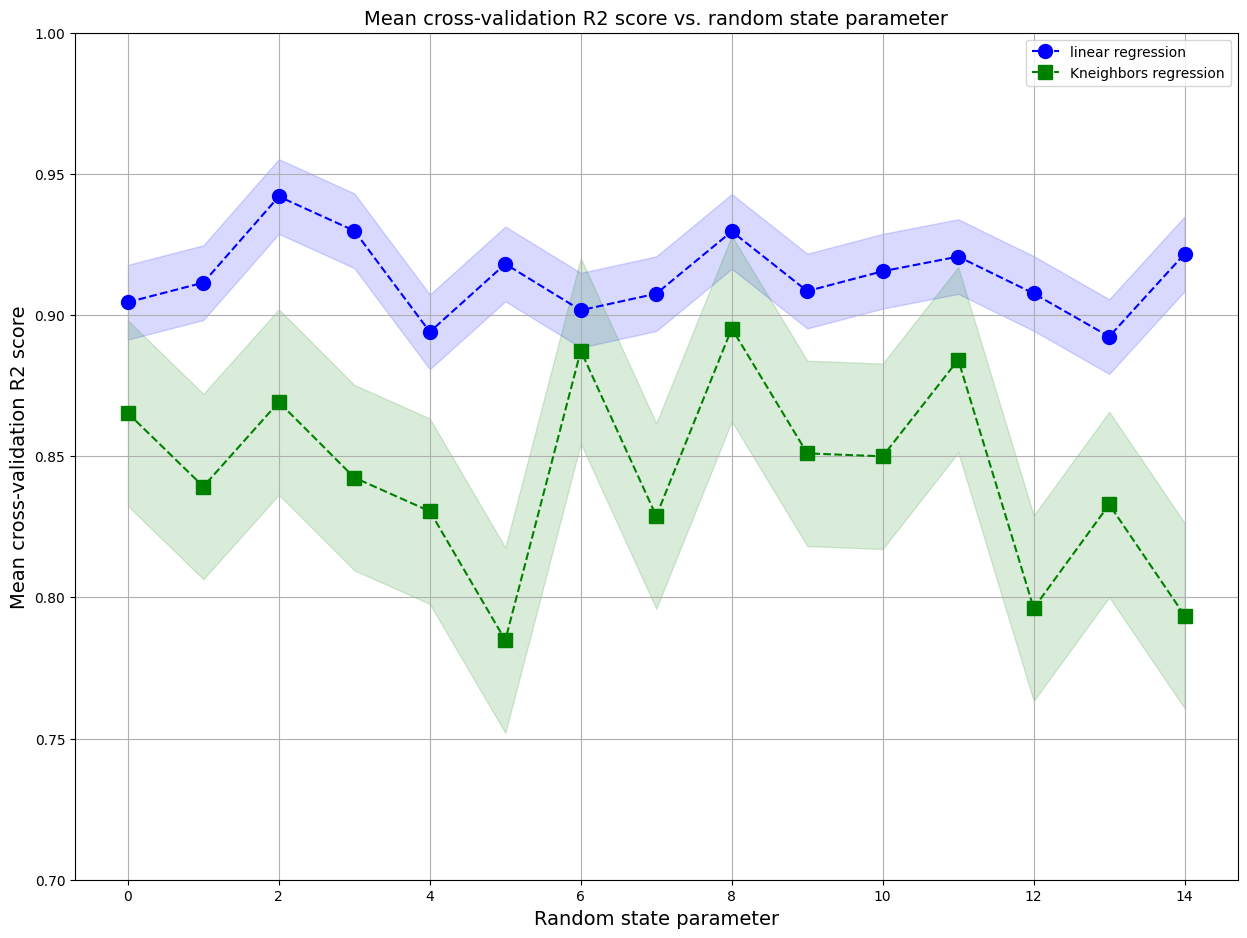

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,11))
plt.plot(range(n),train_score_lr,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='blue', markersize=10,
         label='linear regression')
plt.fill_between(range(n),
                 train_score_lr + train_std_lr,
                 train_score_lr - train_std_lr,
                 alpha=0.15, color='blue')
plt.plot(range(n),train_score_knn,color='green', linestyle='dashed',
         marker='s',markerfacecolor='green', markersize=10,
         label = 'Kneighbors regression')
plt.fill_between(range(n),
                 train_score_knn + train_std_knn,
                 train_score_knn - train_std_knn,
                 alpha=0.15, color='green')
plt.grid()
plt.ylim(0.7,1)
plt.title('Mean cross-validation R2 score vs. random state parameter', size = 14)
plt.xlabel('Random state parameter', size = 14)
plt.ylabel('Mean cross-validation R2 score', size = 14)
plt.legend()
plt.show()

In [19]:
import csv
import numpy as np
import math

In [20]:
def loadData(path):
    f = open(path, "r")
    data = csv.reader(f) #csv format
    data = np.array(list(data))# covert to matrix
    data = np.delete(data, 0, 0)# delete header
    data = np.delete(data, 0, 1) # delete index
    np.random.shuffle(data) # shuffle data
    f.close()
    trainSet = data[:100] #training data from 1->100
    testSet = data[100:]# the others is testing data
    return trainSet, testSet

In [21]:
def calcDistancs(pointA, pointB, numOfFeature=4):
    tmp = 0
    for i in range(numOfFeature):
        tmp += (float(pointA[i]) - float(pointB[i])) ** 2
    return math.sqrt(tmp)

In [23]:
def kNearestNeighbor(trainSet, point, k):
    distances = []
    for item in trainSet:
        distances.append({
            "label": item[-1],
            "value": calcDistancs(item, point)
        })
    distances.sort(key=lambda x: x["value"])
    labels = [item["label"] for item in distances]
    return labels[:k]

In [25]:
def findMostOccur(arr):
    labels = set(arr) # set label
    ans = ""
    maxOccur = 0
    for label in labels:
        num = arr.count(label)
        if num > maxOccur:
            maxOccur = num
            ans = label
    return ans

In [27]:
if __name__ == "__main__":
    trainSet, testSet = loadData('Iris.csv')
    print(trainSet.size)
    for item in testSet:
        knn = kNearestNeighbor(trainSet, item, 5)
        answer = findMostOccur(knn)
        print("label: {} -> predicted: {}".format(item[-1], answer))

500
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-versicolor -> predicted: Iris-virginica
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-virginica
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-versicolor -> predicted: Iris-versicolo

In [28]:
#Required Libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [29]:
penguin= pd.read_csv("penguins.csv")
penguin.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE


In [30]:
x = penguin[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
y = penguin[['species']]

In [31]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, stratify = y,random_state = 4)
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
def knn_modified(X_train,y_train,X_test,k):
    pred = []
    for j in range(len(X_test)):
        distance = []
        min_dist = math.inf
        for i in range(len(X_train)):
            eulidean_distance = np.sqrt(np.sum((X_test[j,] - X_train[i,])**2))
            if eulidean_distance < min_dist:
                distance.append((eulidean_distance, i))
            else:
                continue

        #Sort the list by distance
        distance.sort()

        #Get the row index of its nearest neighbour
        neighbours = []

        for j in range(k):
            neighbours.append(distance[j][1])

        #Append the actual target in a list
        target = []
        for l in range(k):
            target.append(np.array(y_train)[neighbours[l]][0])

        #Create a function for counting
        count = {}
        for t in target:
            count[t] = count.get(t,0) + 1

        #Create a list with (value, key) pair
        pairs = []
        for key in count:
            pairs.append((count[key], key))

        #Sort the pair and get the most occurring word
        pairs.sort(reverse=True)
        if k%2 == 0:
            even = []
            for i in range(0,len(pairs)):
                if pairs[0][0] == pairs[i][0]:
                    even.append(pairs[i][1])
            #print('Arranging in decreasing order: ',even)
            for j in neighbours:
                if y_train[j][0] in even:
                    pred.append(y_train[j][0])
                    #print('Value with the least distance classifies: ',y_train[j][0])
                    #print('Picking classifier based on least distance: ',y_train[j][0])
                    break
                else:
                    pred.append(pairs[0][1])
                    break
        else:
            pred.append(pairs[0][1])

    return(pred)

In [33]:
n = 2
pred = knn_modified(X_train,y_train,X_test,k=n)

In [34]:
neighbors = list(range(1,11))

scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute', metric='euclidean')
    pred1 = knn.fit(X_train, y_train)
    pred = pred1.predict(X_test)
    accuracy =  accuracy_score(y_test, pred)
    scores.append(accuracy)
scores1 = []
neighbors = list(range(1,11))
for i in neighbors:
    pred = knn_modified(X_train,y_train,X_test,k=i)
    accuracy =  accuracy_score(y_test, pred)
    scores1.append(accuracy)

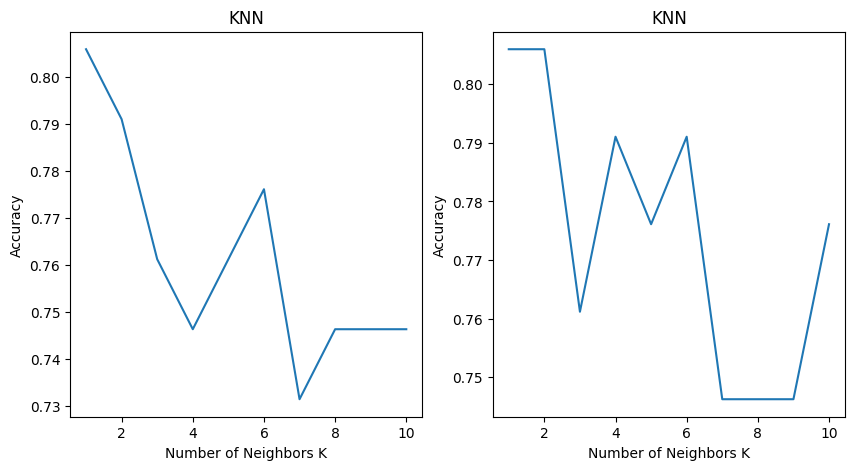

In [35]:
MSE = [ x for x in scores]
plt.figure(figsize=(10, 5))
MSE1 = [ x for x in scores1]
plt.subplot(1,2,1)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.subplot(1,2,2)
plt.plot(neighbors, MSE1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.show()